In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

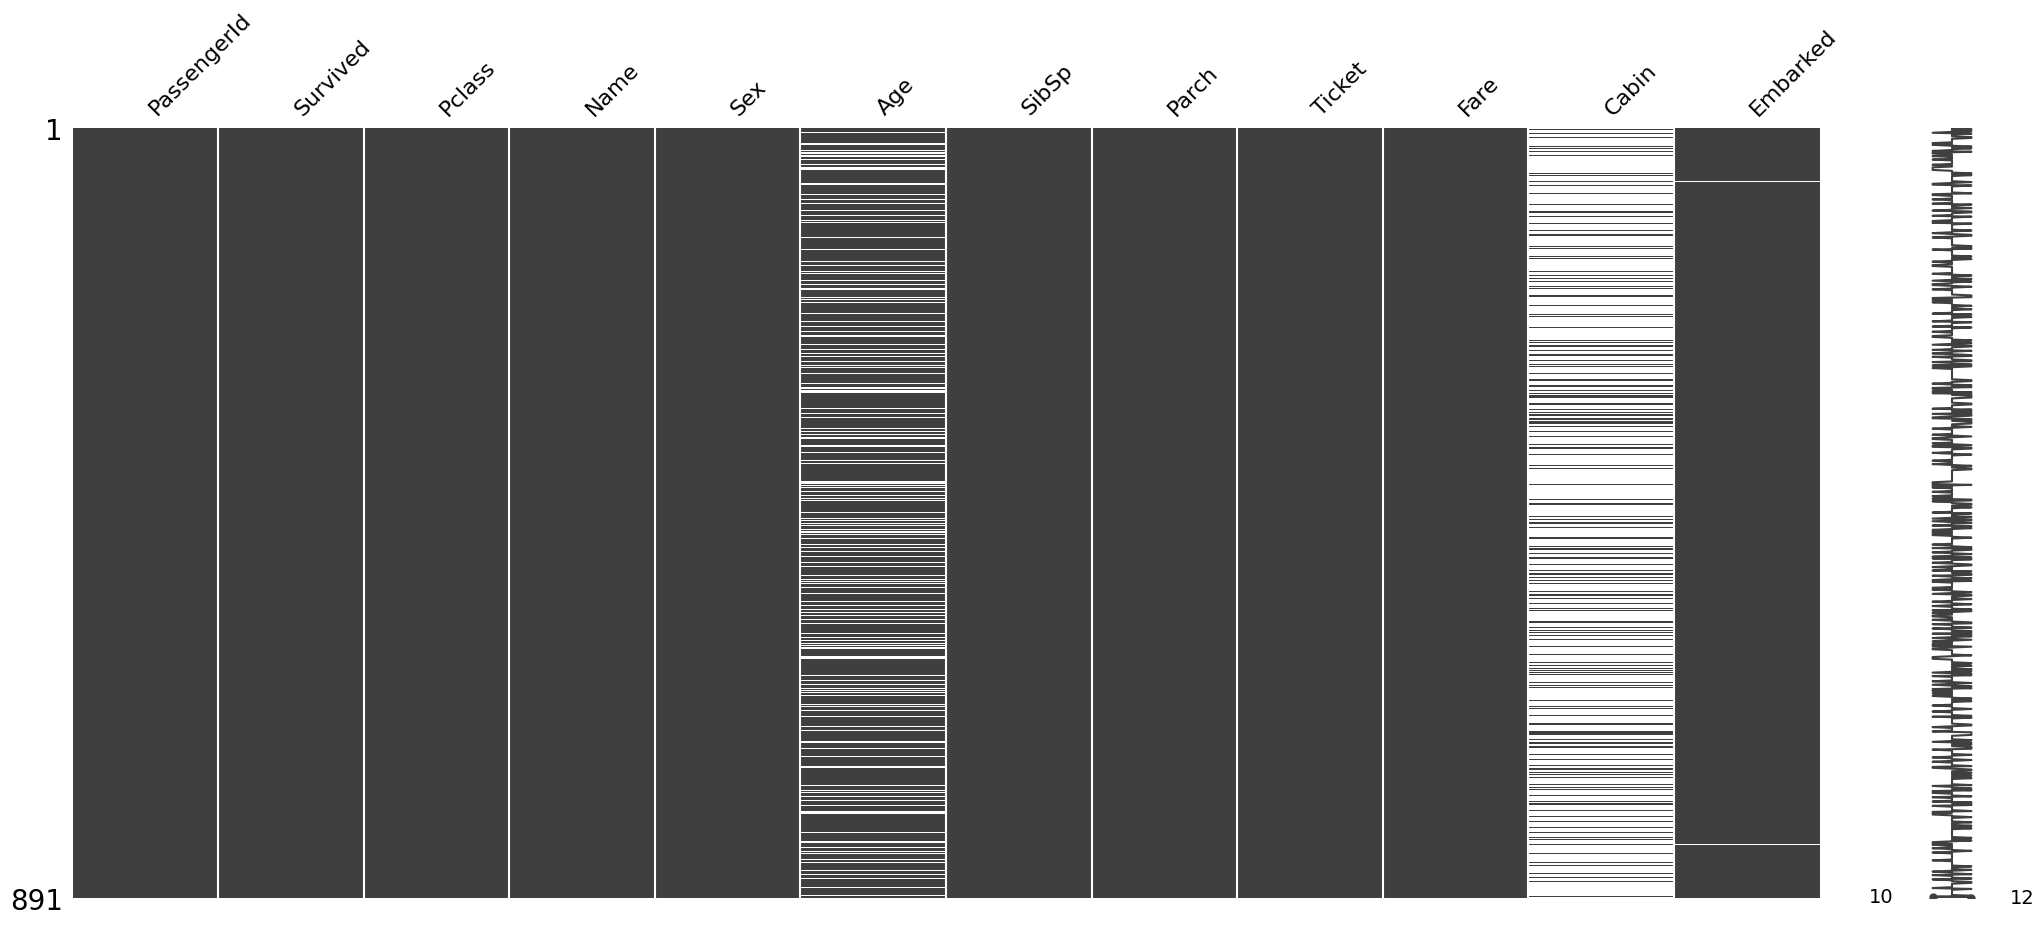

In [10]:
msno.matrix(df_train)

<Axes: >

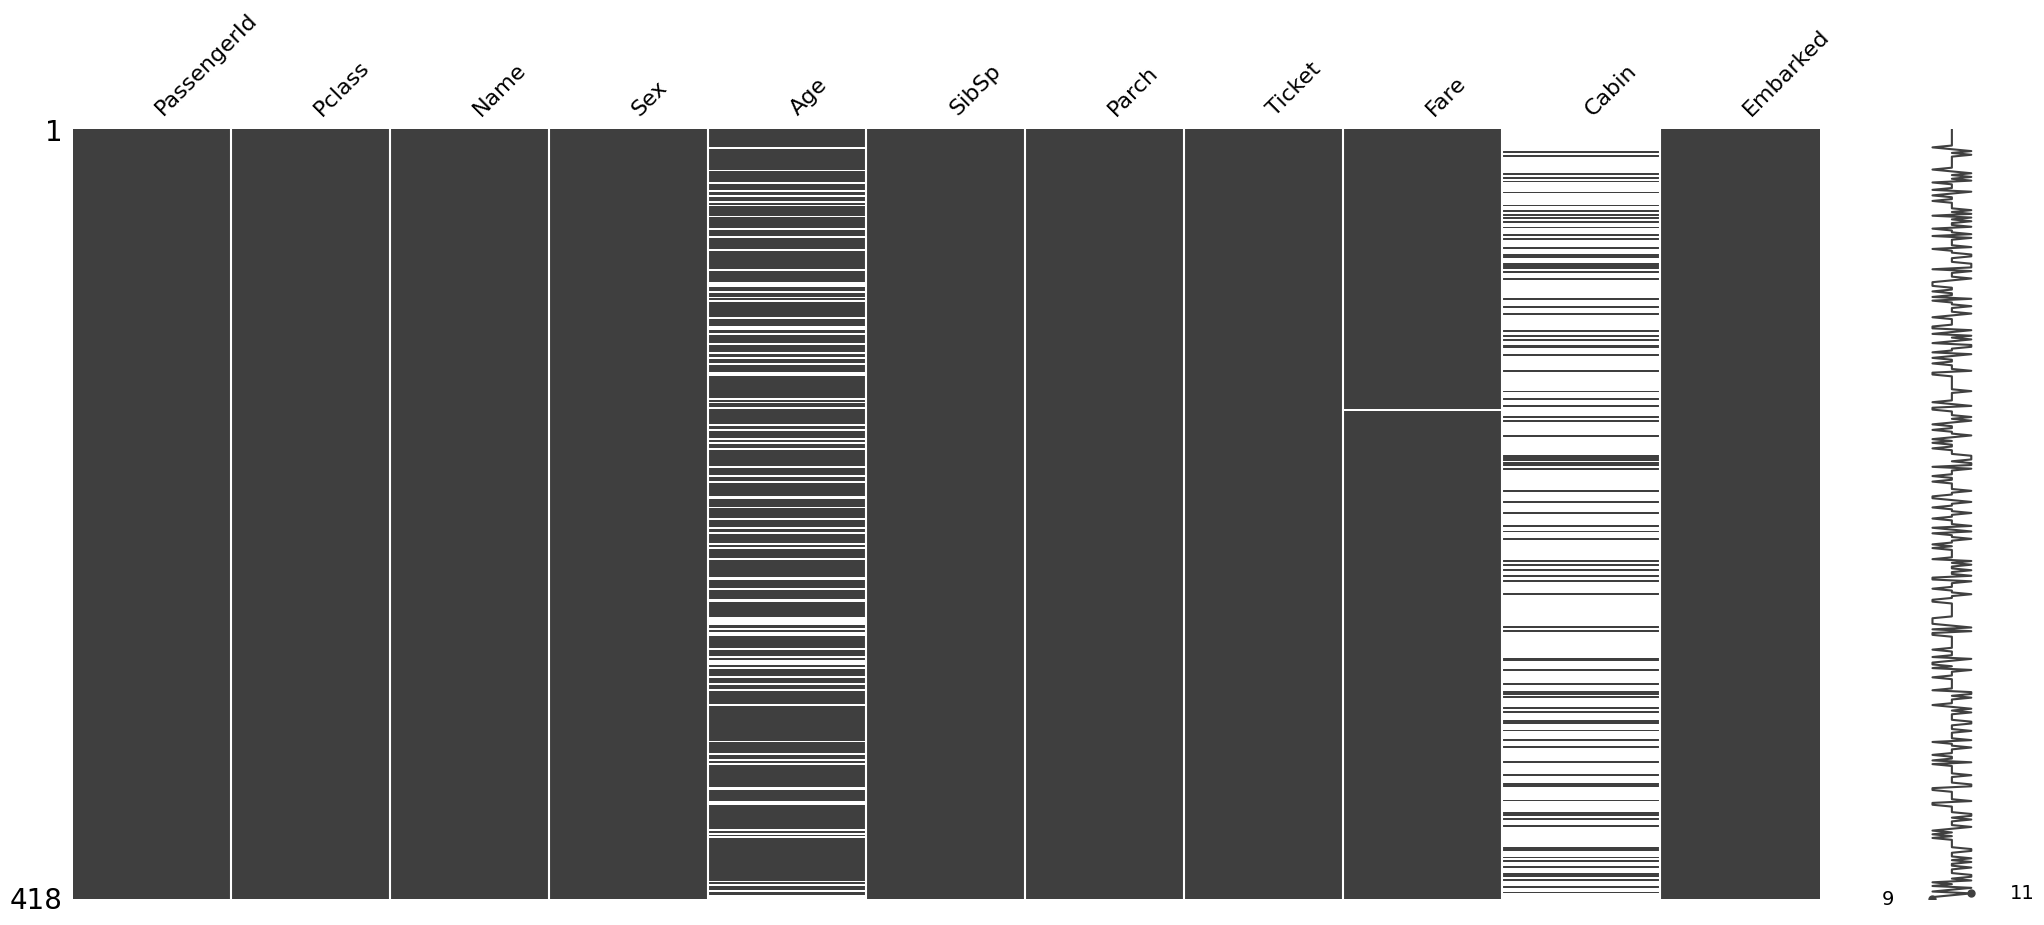

In [11]:
msno.matrix(df_test)

<Axes: xlabel='Survived', ylabel='count'>

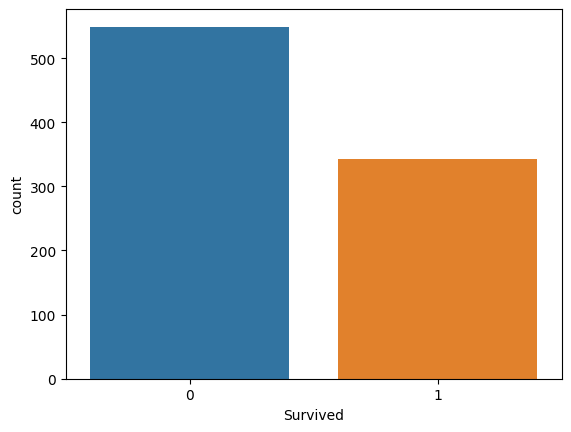

In [12]:
sns.countplot(x='Survived',data=df_train)

In [17]:
df_train['Survived'].sum() / df_train['Survived'].count()

0.3838383838383838

In [24]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [26]:
df_train.groupby(['Survived','Sex','Pclass'])['Survived'].count()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

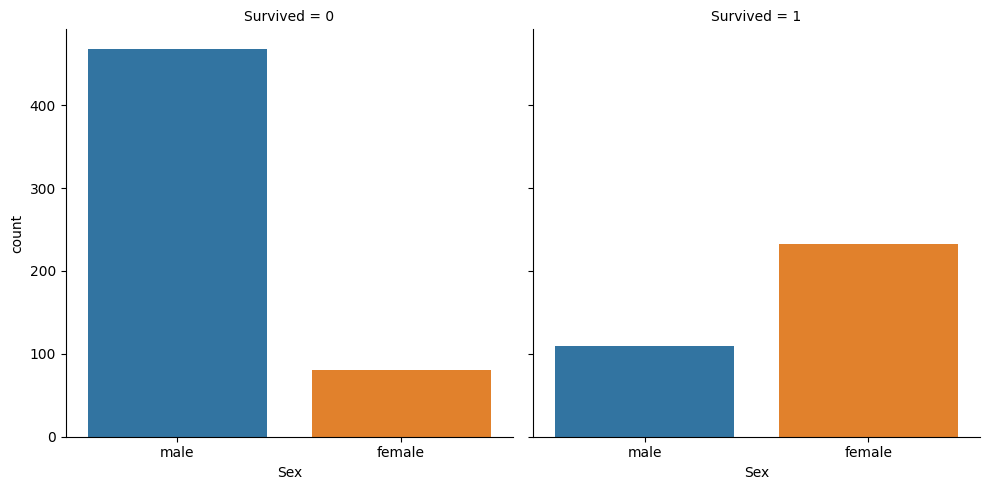

In [29]:
sns.catplot(x='Sex',col='Survived',kind='count',data=df_train)

In [32]:
df_train[df_train['Sex'] == 'female']['Survived'].sum() / df_train[df_train['Sex'] == 'female']['Survived'].count()

0.7420382165605095

In [33]:
df_train[df_train['Sex'] == 'male']['Survived'].sum() / df_train[df_train['Sex'] == 'male']['Survived'].count()

0.18890814558058924

In [38]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
df_train[df_train['Pclass'] == 1]['Survived'].sum() / df_train[df_train['Pclass'] == 1]['Survived'].count()

0.6296296296296297

In [41]:
df_train[df_train['Pclass'] == 2]['Survived'].sum() / df_train[df_train['Pclass'] == 2]['Survived'].count()

0.47282608695652173

In [42]:
df_train[df_train['Pclass'] == 3]['Survived'].sum() / df_train[df_train['Pclass'] == 3]['Survived'].count()

0.24236252545824846

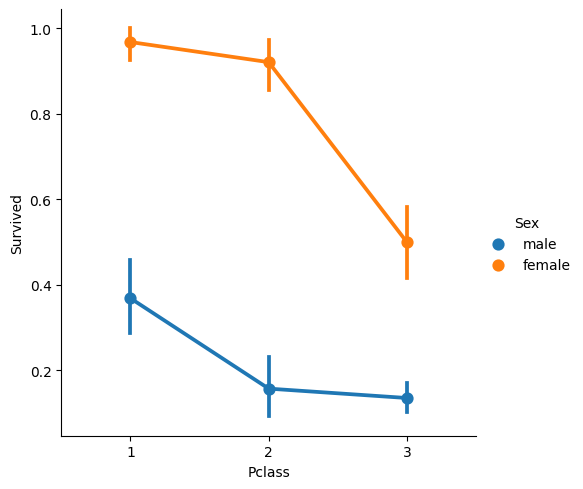

In [45]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=df_train,hue='Sex')

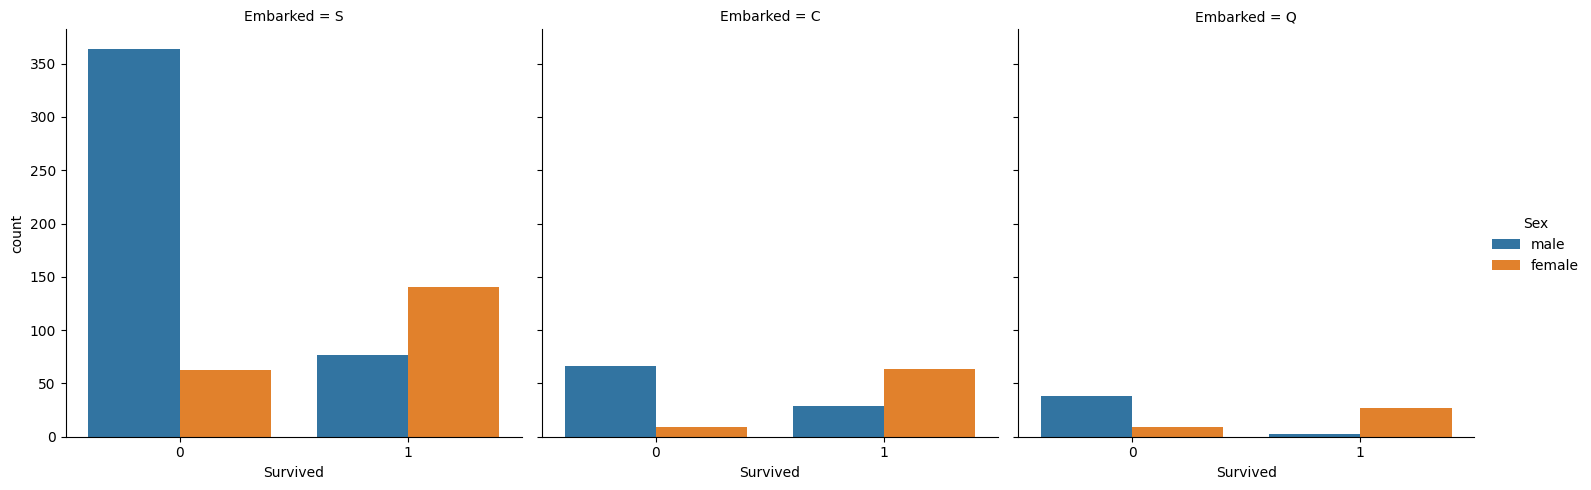

In [49]:
sns.catplot(x='Survived',col='Embarked',kind='count',data=df_train,hue='Sex')

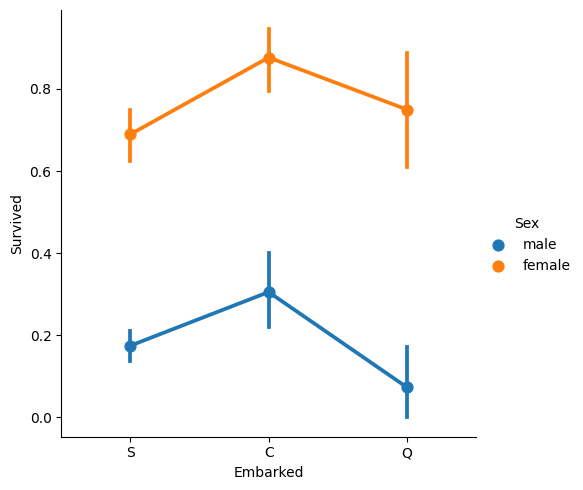

In [52]:
sns.catplot(x='Embarked',y='Survived',kind='point',data=df_train,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

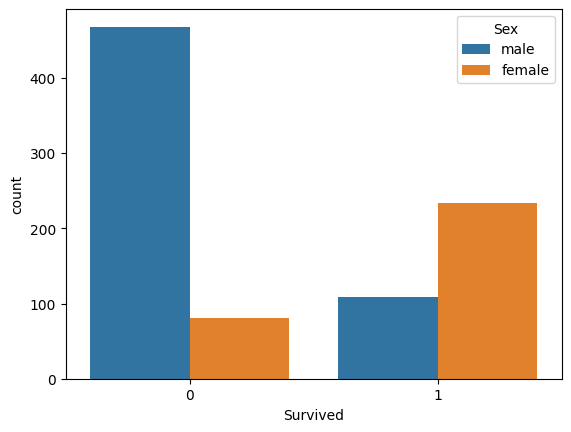

In [13]:
sns.countplot(x='Survived',data=df_train ,hue ='Sex')

<Axes: xlabel='Survived', ylabel='count'>

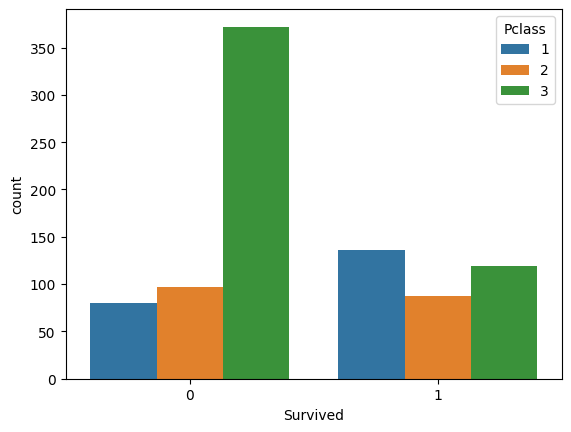

In [14]:
sns.countplot(x='Survived',data=df_train ,hue ='Pclass')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


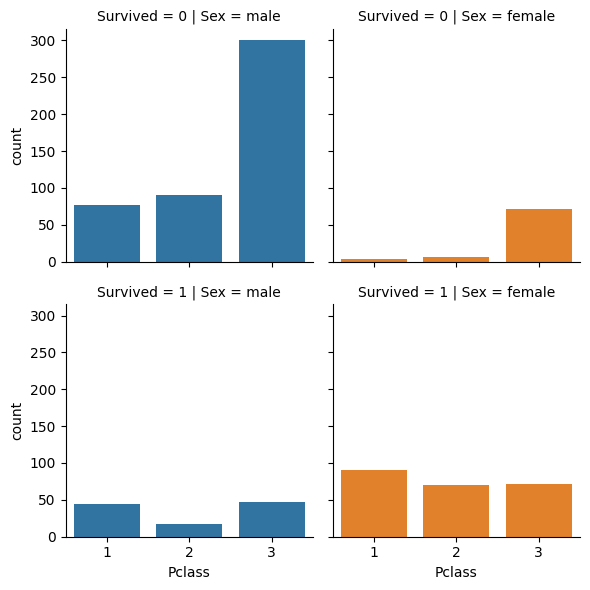

In [28]:
g = sns.FacetGrid(df_train, col ='Sex',row='Survived',hue='Sex')
g.map(sns.countplot,'Pclass')